In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')  

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Columns of 'Name','PassengerId','Ticket''Embarked','Cabin' are not importannt, so we drop them.
data.drop(['Name','PassengerId','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [5]:
data.shape

(891, 7)

In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [8]:
data.isnull().sum().sort_values(ascending=False)

Age         177
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [9]:
null_values=[(i,data[i].isna().mean()*100) for i in data]
null_df=pd.DataFrame(null_values,columns=['column_name','percentage'])
null_df

,column_name,percentage
0,Survived,0.00000
1,Pclass,0.00000
2,Sex,0.00000
3,Age,19.86532
4,SibSp,0.00000
5,Parch,0.00000
6,Fare,0.00000


In [10]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [11]:
data.isnull().sum().sort_values(ascending=False)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [12]:
numerical=data.select_dtypes(exclude=['object'])
categorical=data.select_dtypes(include=['object'])
numerical.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

<AxesSubplot:>

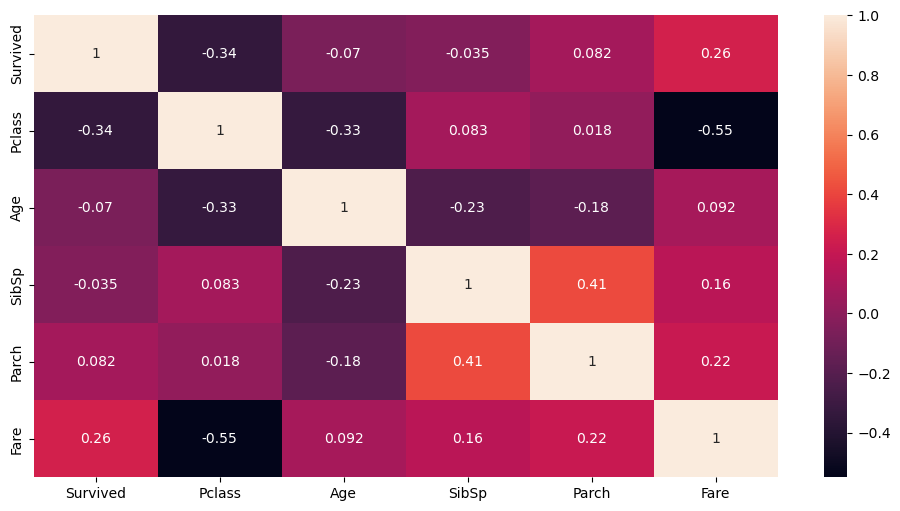

In [13]:
#Correlation Analysis
plt.figure(figsize=(12, 6))
sns.heatmap(numerical.corr(),  annot=True)

In [14]:
#'Fare' has a correlation with 'Pclass', so it is better to drop it.
data.drop(['Fare'], axis=1, inplace=True)

In [15]:
data.shape

(891, 6)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

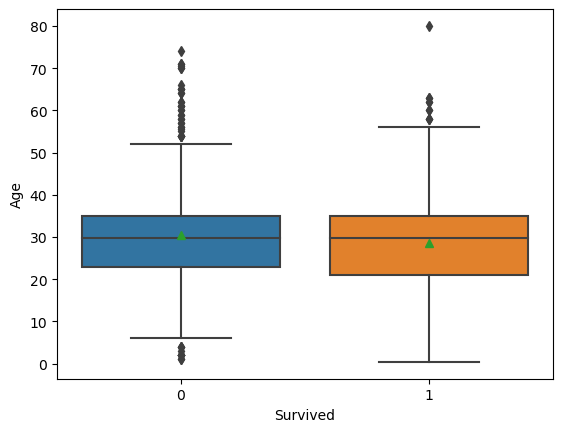

In [16]:
sns.boxplot( x='Survived', y='Age',data=data, showmeans=True)

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

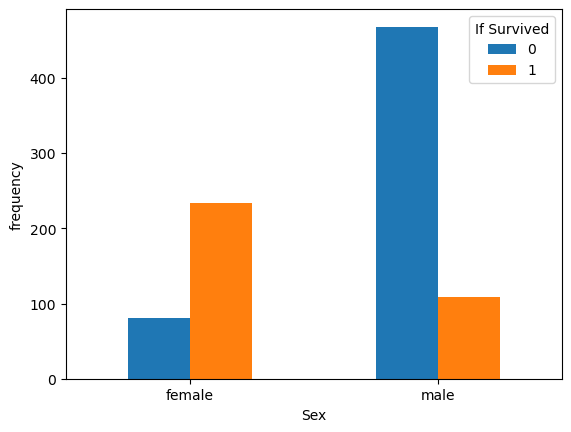

In [17]:
#Grouped and Stacked Bar Chart
df_grouped = pd.crosstab(data['Sex'], data['Survived'])
df_grouped.plot.bar(stacked = False)
plt.legend(title =  'If Survived')
plt.ylabel('frequency')
plt.xticks(rotation = 0)

In [18]:
#
data=pd.get_dummies(data, drop_first=True)
data

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.000000,1,0,1
1,1,1,38.000000,1,0,0
2,1,3,26.000000,0,0,0
3,1,1,35.000000,1,0,0
4,0,3,35.000000,0,0,1
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,1
887,1,1,19.000000,0,0,0
888,0,3,29.699118,1,2,0
889,1,1,26.000000,0,0,1


# Building Models:

In [19]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split (X, y, test_size=0.2, random_state=42)

In [21]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## 1. LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression


In [23]:
log_reg=LogisticRegression(random_state=42, solver="liblinear")
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [24]:
y_pred=log_reg.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.8212290502793296

## 2. Naive Bayes Classifer

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
model_nb = GaussianNB().fit(X_train, y_train)

In [28]:
#Prediction on test
y_pred_nb = model_nb.predict(X_test)


In [29]:
accuracy_score(y_test,y_pred_nb)

0.7597765363128491

## 3. Linear Discriminant Analysis(LDA)

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [31]:
model_lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [32]:
#Prediction on test
y_pred_lda = model_lda.predict(X_test)


In [33]:
accuracy_score(y_test,y_pred_lda)

0.7932960893854749